# Seminar in Climatology


## Sources
The current extreme heat is due to an anticyclone, a high-pressure system, that is dominating the upper atmosphere over southern Europe. As well as compressing and warming air, high-pressure systems are associated with reduced cloud cover, allowing more solar radiation to reach the ground. This allows for substantial heating of Earth’s surface by the sun, heat which then moves upwards into the atmosphere. The long days and short nights of summer mean that this heating effect is maximised. (Copernicus)

Large scale winds, advection, blowing hot air for example from northern Africa into Europe, can also contribute to heatwaves. For the current heatwave this factor seems to be less important. (Copernicus)

In [2]:
# General libs for file paths, data extraction, etc
from glob import glob
from pathlib import Path
from os.path import basename
import zipfile # To extract zipfiles
import urllib3 
# Disable warnings for data download via API
urllib3.disable_warnings() 

# CDS API
import cdsapi

# Libraries for working with multi-dimensional arrays
import numpy as np
import xarray as xr
import xarray.plot as xplot
import pandas as pd

# Libraries for plotting and visualising data
import matplotlib.path as mpath
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature

from datetime import datetime

# ERA-5 Data Set

In [3]:
ERA_data = xr.open_dataset('../data/ERA_data_july_heatwaves.nc')

In [202]:
# Remove '#' to get a overview about the variables in the file
#ERA_data.variables

## ERA-5: Geopotential Height (Absolute Values)

### Overview About the Geopotential Height Using ERA-5 Data

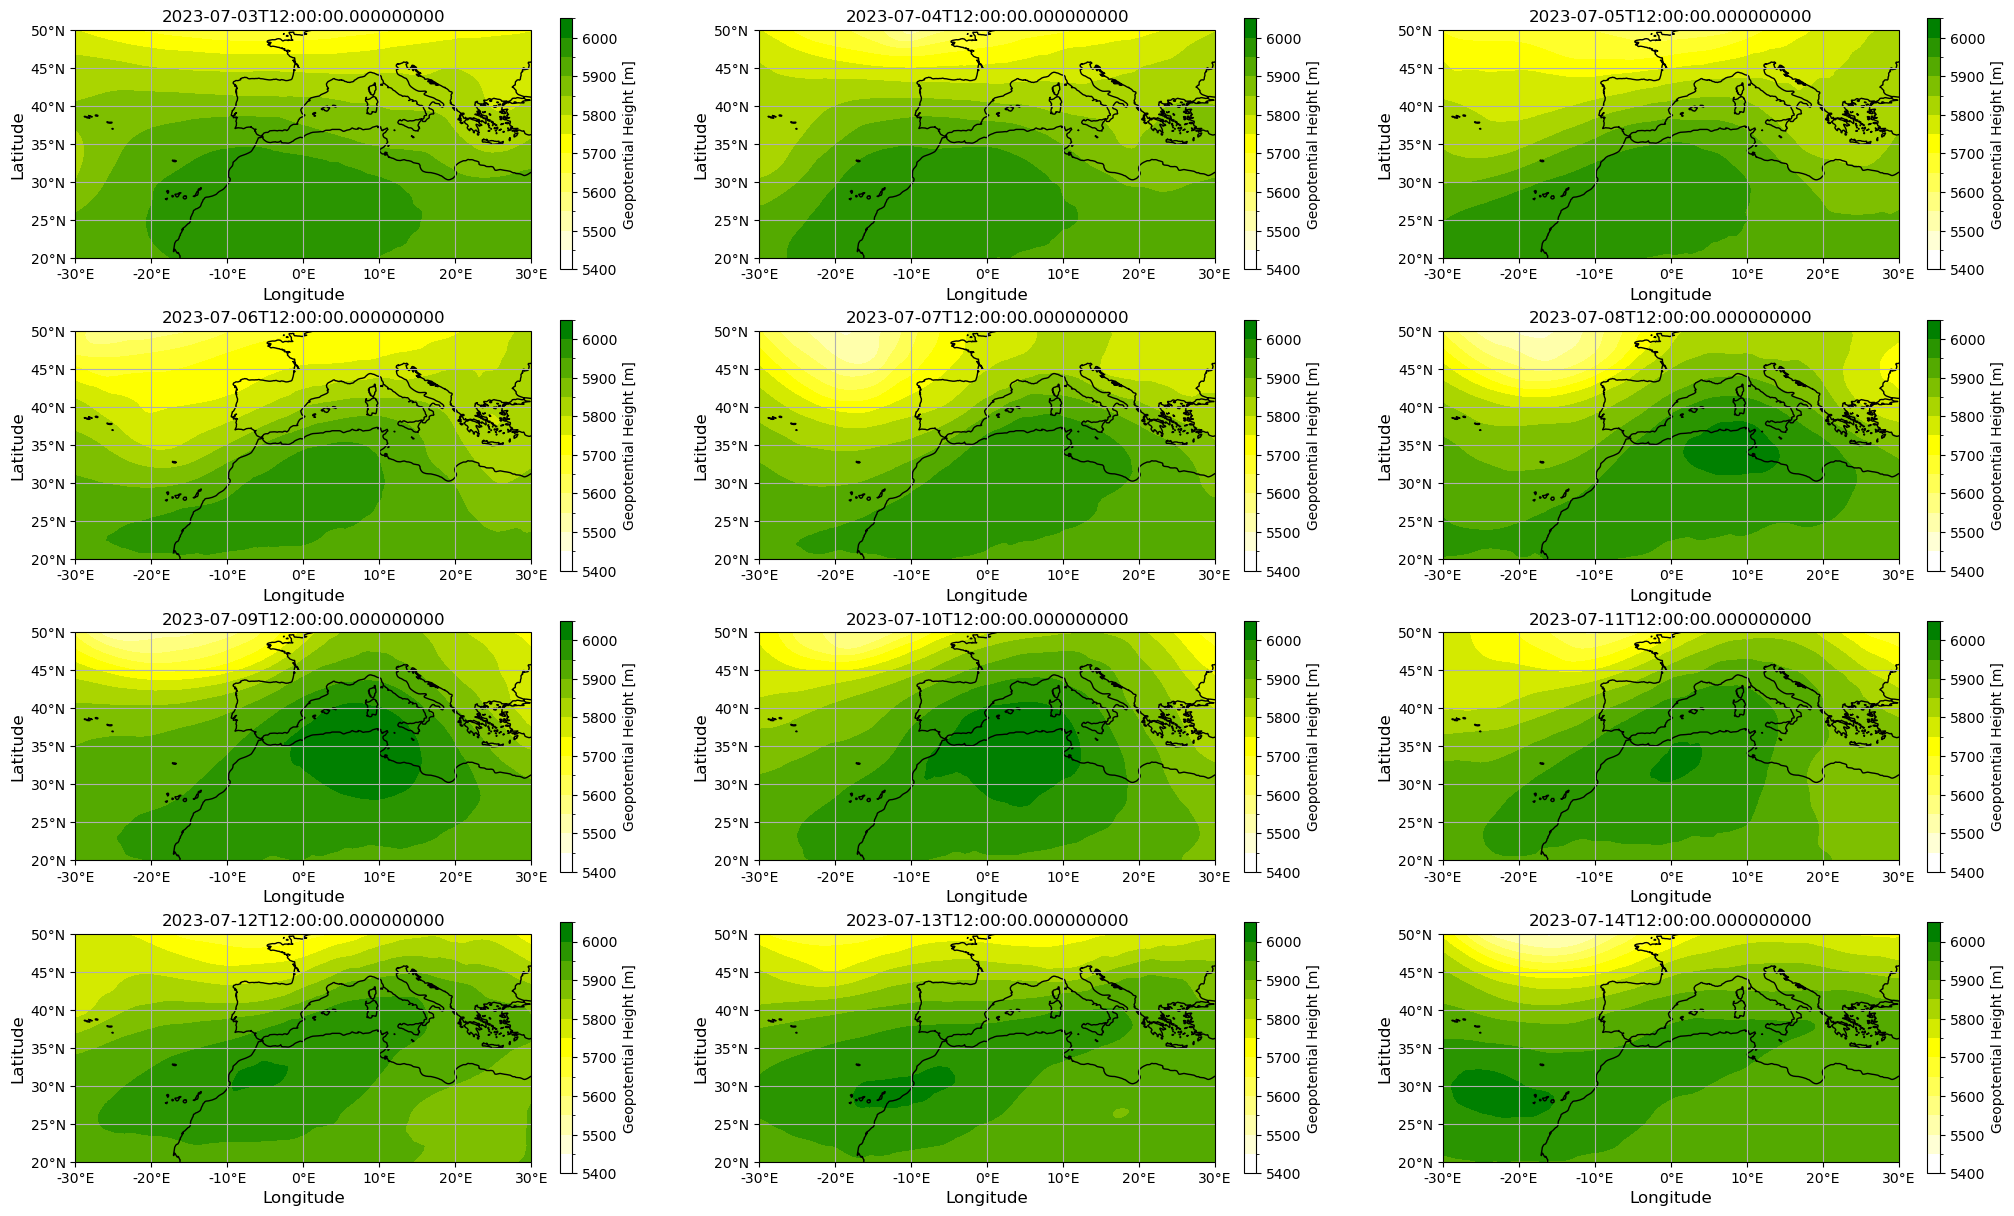

In [205]:
# Define the area of interest, a color bar and the levels
lon_range = slice(-30, 30)
lat_range = slice(20, 50)
levels = np.arange(5400, 6100, 50)
cmap = colors.LinearSegmentedColormap.from_list('mycmap', ['white', 'yellow','green'])

# Read the geopotential height at 500hPa at a specific date
# we divide all values by the gravitational acceleration because the values refer to the geopotential 
z_sliced = ERA_data['z'].sel(level = 500, lon=lon_range, lat=lat_range)/9.81

# Select specific timesteps [0 - 68]
z_selected_timesteps = z_sliced['time'].isel(time=slice(10, 68, 4))

# Plot the 2-meter temperature for the selected timesteps
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(25, 15), subplot_kw={'projection': ccrs.PlateCarree()})
for i, ax in enumerate(axes.flat):
    plot_data = z_sliced.sel(time=z_selected_timesteps[i])
    rounded_time = plot_data.time.dt.round('min')  # Round the time values to the nearest minute
    xplot.contourf(plot_data, ax=ax, cmap=cmap, levels=levels, cbar_kwargs={'label': 'Geopotential Height [m]'})
    ax.coastlines()
    ax.gridlines(draw_labels=False)  # Draw gridlines only for the bottom and left axes
    ax.set_ylabel('Latitude', fontsize=12)
    ax.set_yticks(range(20, 51, 5))  # Add explicit ticks for the y-axis
    ax.set_yticklabels([f'{lat}°N' for lat in range(20, 51, 5)], fontsize=10)  # Add explicit labels for the y-axis
    ax.set_xlabel('Longitude', fontsize=12)
    ax.set_xticks(np.arange(-30, 31, 10))  # Add explicit ticks for the x-axis with 10 degree step
    ax.set_xticklabels([f'{lon}°E' for lon in np.arange(-30, 31, 10)], fontsize=10)  # Add explicit labels for the x-axis
    ax.set_title(rounded_time.values, fontsize=12)  # Set the title with rounded time values

# Save the plot as a PNG file
#plt.savefig('../analysis/ERA_t2m.pdf')

# Show the plot
plt.show()

### Reference for Comparison (Noon [2023.07.12, 12:00 UTC] and Midnight [2023.07.13, 00:00 UTC])

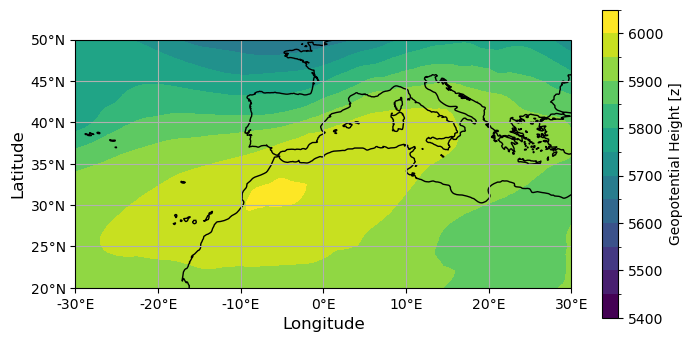

In [191]:
# Define the area of interest and the levels of the colorbar
lon_range = slice(-30, 30)
lat_range = slice(20, 50)
levels = np.arange(5400, 6100, 50)

# Read the geopotential height at 500hPa at a specific date
# we divide all values by the gravitational acceleration because the values refer to the geopotential 
ERA_z_500 = ERA_data['z'].sel(level = 500, time='2023-07-12T12:00:00', lon=lon_range, lat=lat_range)/9.81
# remove "#" to use this line --> Reference for the Geopotential Height at Midnight
#ERA_z_500 = ERA_data['z'].sel(level = 500, time='2023-07-13T00:00:00', lon=lon_range, lat=lat_range)/9.81

# Plot the 2-meter temperature for the selected timesteps
fig, ax = plt.subplots(figsize=(8, 4), subplot_kw={'projection': ccrs.PlateCarree()})
# Use contour and define some parameters
xplot.contourf(ERA_z_500 , ax=ax, cmap='viridis', levels=levels, cbar_kwargs={'label': 'Geopotential Height [z]'})
# Add coastlines
ax.coastlines()
# Draw gridlines but no labels (we will do that later using a for loop) 
ax.gridlines(draw_labels=False)  

# Add labels and ticks
ax.set_ylabel('Latitude', fontsize=12)
# Define the latitudes
ax.set_yticks(range(20, 51, 5))  
# Set the latitudes using a for-loop
ax.set_yticklabels([f'{lat}°N' for lat in range(20, 51, 5)], fontsize=10) 
ax.set_xlabel('Longitude', fontsize=12)
# Define the longitude
ax.set_xticks(np.arange(-30, 31, 10)) 
# Set the longitudes using a for-loop
ax.set_xticklabels([f'{lon}°E' for lon in np.arange(-30, 31, 10)], fontsize=10)  
# we do not want any title because we will be using captions in the report
ax.set_title(None)

# Save the plot as a PDF file
#plt.savefig('../analysis/ERA_geopot_selected_timesteps_07.12.noon.pdf')

# Show the plot
plt.show()

## ERA-5: 2 Meter Air Temperature (Absolute Values)

### Overview About the 2 Meter Air Temperature Using ERA-5 Data

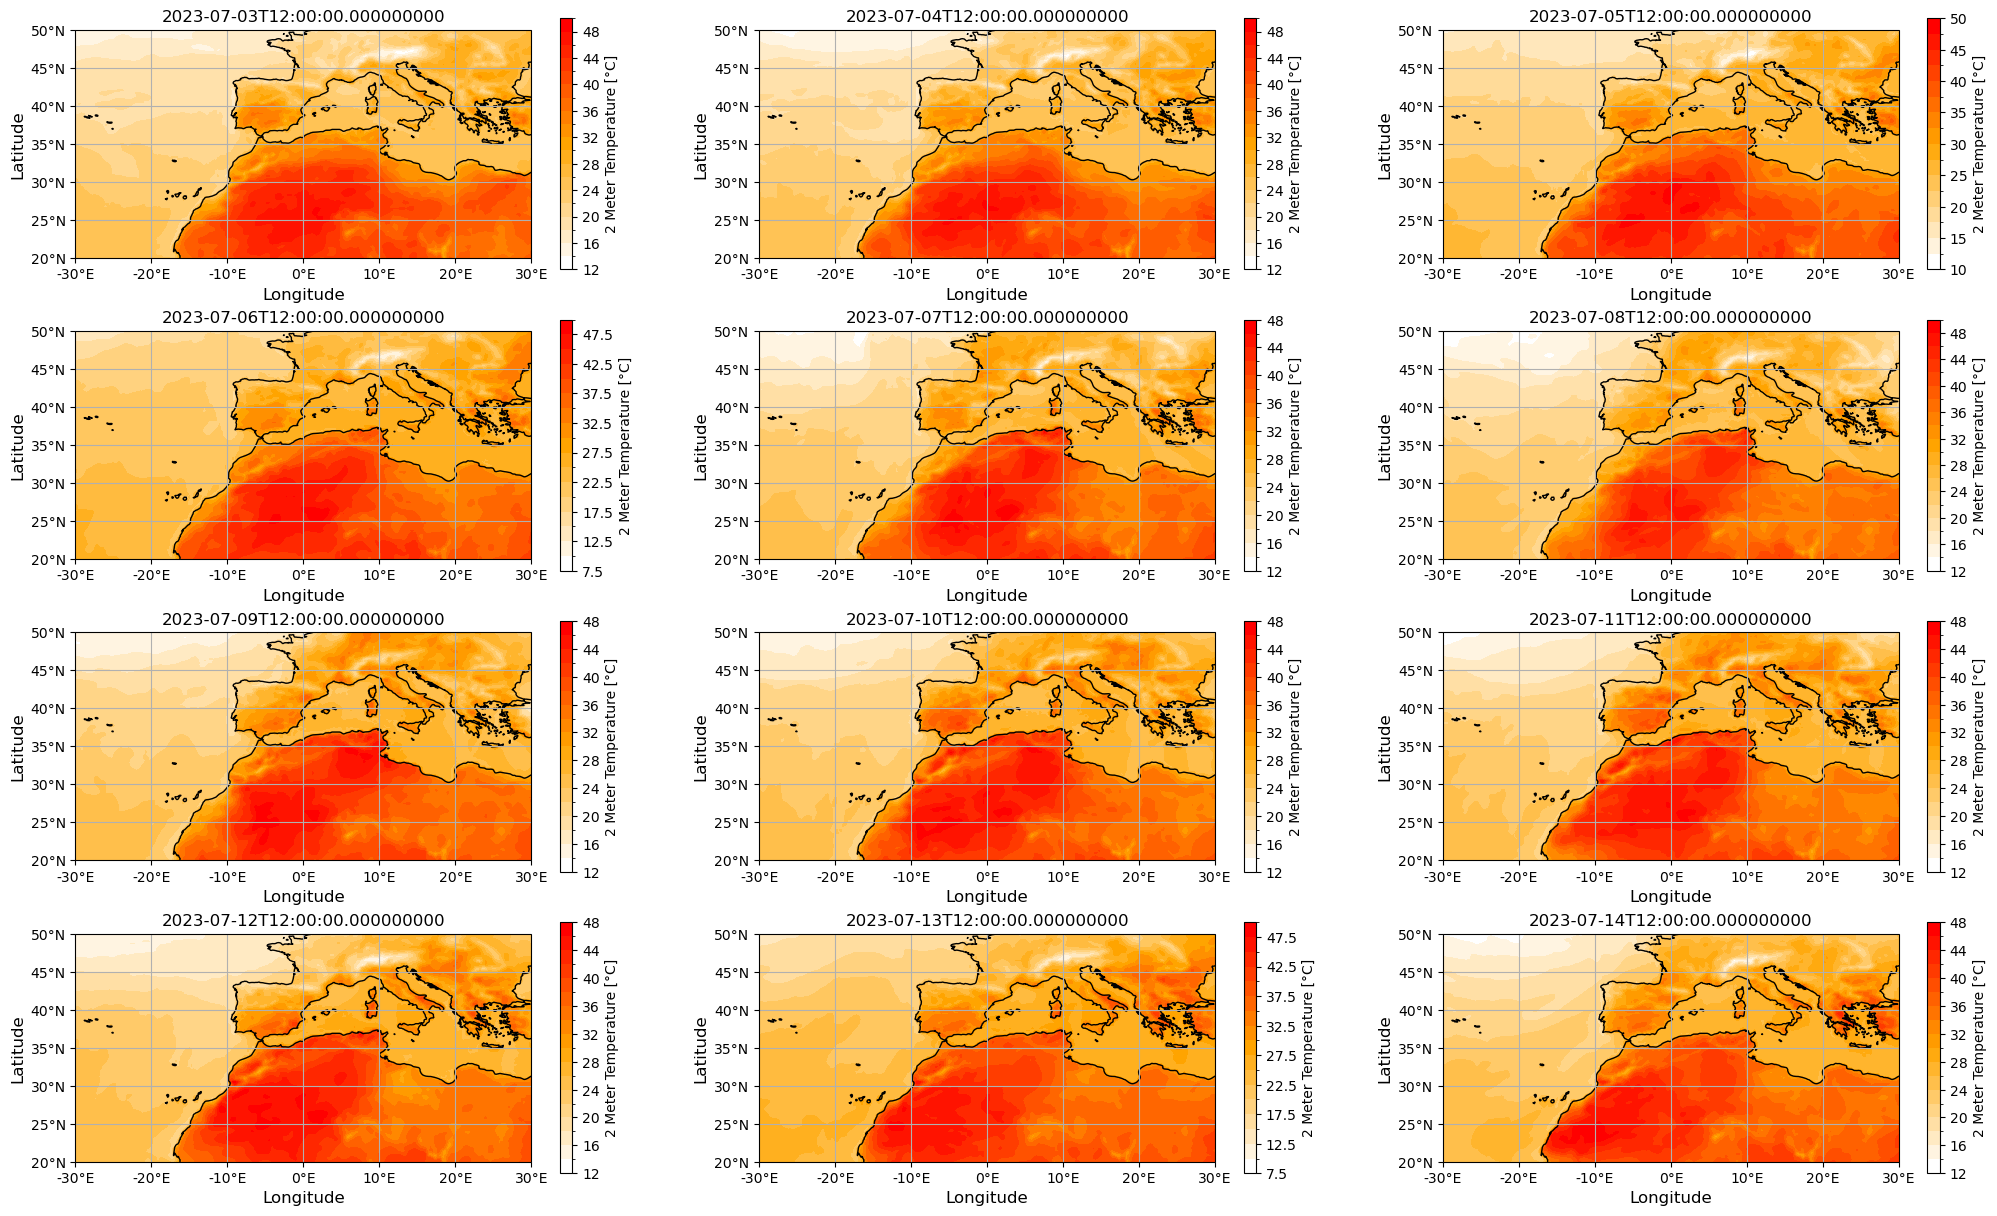

In [206]:
# Define the area of interest, a color bar and the levels
lon_range = slice(-30, 30)
lat_range = slice(20, 50)
levels = np.arange(5, 55, 2)
cmap = colors.LinearSegmentedColormap.from_list('mycmap', ['white', 'orange', 'red'])

# Select the 2-meter temperature data for the specified longitude and latitude ranges
t2m_sliced = ERA_data['t2m'].sel(lon=lon_range, lat=lat_range)-273.15

# Select specific timesteps
t2m_selected_timesteps = t2m_sliced['time'].isel(time=slice(10, 68, 4))

# Plot the 2-meter temperature for the selected timesteps
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(25, 15), subplot_kw={'projection': ccrs.PlateCarree()})
for i, ax in enumerate(axes.flat):
    plot_data = t2m_sliced.sel(time=t2m_selected_timesteps[i])
    rounded_time = plot_data.time.dt.round('min')  # Round the time values to the nearest minute
    xplot.contourf(plot_data, ax=ax, cmap=cmap, levels=20, cbar_kwargs={'label': '2 Meter Temperature [°C]'})
    ax.coastlines()
    ax.gridlines(draw_labels=False)  # Draw gridlines only for the bottom and left axes
    ax.set_ylabel('Latitude', fontsize=12)
    ax.set_yticks(range(20, 51, 5))  # Add explicit ticks for the y-axis
    ax.set_yticklabels([f'{lat}°N' for lat in range(20, 51, 5)], fontsize=10)  # Add explicit labels for the y-axis
    ax.set_xlabel('Longitude', fontsize=12)
    ax.set_xticks(np.arange(-30, 31, 10))  # Add explicit ticks for the x-axis with 10 degree step
    ax.set_xticklabels([f'{lon}°E' for lon in np.arange(-30, 31, 10)], fontsize=10)  # Add explicit labels for the x-axis
    ax.set_title(rounded_time.values, fontsize=12)  # Set the title with rounded time values

# Save the plot as a PNG file
#plt.savefig('../analysis/ERA_t2m.pdf')

# Show the plot
plt.show()

### Reference for Comparison (Noon [2023.07.12, 12:00 UTC] and Midnight [2023.07.13, 00:00 UTC])

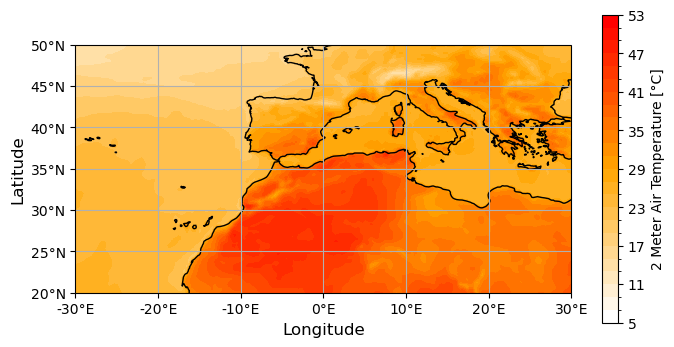

In [207]:
# Define the area of interest, the colorbar and the levels of the colorbar
lon_range = slice(-30, 30)
lat_range = slice(20, 50)
levels = np.arange(5, 55, 2)
cmap = colors.LinearSegmentedColormap.from_list('mycmap', ['white', 'orange', 'red'])

# Read the 2 meter air temperature at a specific date
# Converte all values into °C because we work with absolut values
ERA_t2m = ERA_data['t2m'].sel(time='2023-07-12T12:00:00', lon=lon_range, lat=lat_range)-273.15
# remove "#" to use this line --> Reference for the 2 meter air temperature at Midnight
#ERA_t2m  = ERA_data['t2m'].sel(time='2023-07-13T00:00:00', lon=lon_range, lat=lat_range)-273.15

# Plot the 2-meter temperature for the selected timesteps
fig, ax = plt.subplots(figsize=(8, 4), subplot_kw={'projection': ccrs.PlateCarree()})
# Use contour and define some parameters
xplot.contourf(ERA_t2m, ax=ax, cmap=cmap, levels=levels, cbar_kwargs={'label': '2 Meter Air Temperature [°C]'})
# Add coastlines
ax.coastlines()
# Draw gridlines but no labels (we will do that later using a for loop) 
ax.gridlines(draw_labels=False)  

# Add labels and ticks
ax.set_ylabel('Latitude', fontsize=12)
# Define the latitudes
ax.set_yticks(range(20, 51, 5))  
# Set the latitudes using a for-loop
ax.set_yticklabels([f'{lat}°N' for lat in range(20, 51, 5)], fontsize=10) 
ax.set_xlabel('Longitude', fontsize=12)
# Define the longitude
ax.set_xticks(np.arange(-30, 31, 10)) 
# Set the longitudes using a for-loop
ax.set_xticklabels([f'{lon}°E' for lon in np.arange(-30, 31, 10)], fontsize=10)  
# we do not want any title because we will be using captions in the report
ax.set_title(None)

# Save the plot as a PDF file
#plt.savefig('../analysis/ERA_geopot_selected_timesteps_07.12.noon.pdf')

# Show the plot
plt.show()

# Pangu-Weather Data Set

## Adress the Issues in the Coordinate-System and the Timesteps

In [208]:
# Open netCDF file: Data 2.7.2023
Pangu_data_20230702 = xr.open_dataset('../data/HW_EU_20230702.nc')
# Change longitudes directly in the netCDF file (from 0-360 to -180 to 180)
Pangu_data_20230702['longitude'] = Pangu_data_20230702['longitude'] - 180

# Reverse latitude values (we have 50°N-20°N but we need 20°N to 50°N)
Pangu_data_20230702['latitude'] = Pangu_data_20230702['latitude'][::-1]
# Reverse temperature values along the latitude dimension
Pangu_data_20230702['t2'] = Pangu_data_20230702['t2'].isel(latitude=slice(None, None, -1))
# rename longitude and latitude
Pangu_data_20230702 = Pangu_data_20230702.rename({'longitude': 'lon', 'latitude': 'lat'})


# The file contains a timestamp in nanoseconds after forecast
# Read the timesteps
delta_ns = Pangu_data_20230702['step']
# Extract the values from delta_ns
step_values = delta_ns.values
# Define a base date --> here, it is the date of the forecast
base_date = np.datetime64('2023-07-02T12:00:00')
# Convert nanoseconds to seconds
seconds = step_values / 1e9
# Create an empty list to store the converted dates
converted_dates = []
# Iterate over the seconds array and add each converted date to the list
for second in seconds:
    converted_dates.append(base_date + np.timedelta64(int(second), 's'))
# Convert the list to a NumPy array
converted_dates_array = np.array(converted_dates)

Pangu_data_20230702 = Pangu_data_20230702.assign_coords(step=('step', converted_dates_array))

/var/folders/kg/k9dqcpss0y310jjn3nlh0z_w0000gn/T/ipykernel_74347/3280003357.py:31: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  Pangu_data_20230702 = Pangu_data_20230702.assign_coords(step=('step', converted_dates_array))


In [209]:
# Open netCDF file: Data 7.7.2023
Pangu_data_20230707 = xr.open_dataset('../data/HW_EU_20230707.nc')
Pangu_data_20230707['longitude'] = Pangu_data_20230707['longitude'] - 180

# Reverse latitude values (we have 50°N-20°N but we need 20°N to 50°N)
Pangu_data_20230707['latitude'] = Pangu_data_20230707['latitude'][::-1]
# Reverse temperature values along the latitude dimension
Pangu_data_20230707['t2'] = Pangu_data_20230707['t2'].isel(latitude=slice(None, None, -1))
# rename longitude and latitude
Pangu_data_20230707 = Pangu_data_20230707.rename({'longitude': 'lon', 'latitude': 'lat'})

delta_ns = Pangu_data_20230707['step']
step_values = delta_ns.values
base_date = np.datetime64('2023-07-07T12:00:00')
seconds = step_values / 1e9

converted_dates = []
for second in seconds:
    converted_dates.append(base_date + np.timedelta64(int(second), 's'))

converted_dates_array = np.array(converted_dates)
Pangu_data_20230707 = Pangu_data_20230707.assign_coords(step=('step', converted_dates_array))

/var/folders/kg/k9dqcpss0y310jjn3nlh0z_w0000gn/T/ipykernel_74347/2070691553.py:22: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  Pangu_data_20230707 = Pangu_data_20230707.assign_coords(step=('step', converted_dates_array))


In [210]:
# Open netCDF file:  Data 11.7.2023
Pangu_data_20230711 = xr.open_dataset('../data/HW_EU_20230711.nc')
Pangu_data_20230711['longitude'] = Pangu_data_20230711['longitude'] - 180

# Reverse latitude values (we have 50°N-20°N but we need 20°N to 50°N)
Pangu_data_20230711['latitude'] = Pangu_data_20230711['latitude'][::-1]
# Reverse temperature values along the latitude dimension
Pangu_data_20230711['t2'] = Pangu_data_20230711['t2'].isel(latitude=slice(None, None, -1))
# rename longitude and latitude
Pangu_data_20230711 = Pangu_data_20230711.rename({'longitude': 'lon', 'latitude': 'lat'})

delta_ns = Pangu_data_20230711['step']
step_values = delta_ns.values
base_date = np.datetime64('2023-07-11T12:00:00')
seconds = step_values / 1e9

converted_dates = []
for second in seconds:
    converted_dates.append(base_date + np.timedelta64(int(second), 's'))

converted_dates_array = np.array(converted_dates)

Pangu_data_20230711 = Pangu_data_20230711.assign_coords(step=('step', converted_dates_array))

/var/folders/kg/k9dqcpss0y310jjn3nlh0z_w0000gn/T/ipykernel_74347/3581442993.py:23: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  Pangu_data_20230711 = Pangu_data_20230711.assign_coords(step=('step', converted_dates_array))


In [211]:
# Control call to verify whether the conversion from time delta into a date was successful
print(Pangu_data_20230702['step'])

<xarray.DataArray 'step' (step: 14)> Size: 112B
array(['2023-07-12T06:00:00.000000000', '2023-07-12T12:00:00.000000000',
       '2023-07-12T18:00:00.000000000', '2023-07-13T00:00:00.000000000',
       '2023-07-13T06:00:00.000000000', '2023-07-13T12:00:00.000000000',
       '2023-07-13T18:00:00.000000000', '2023-07-14T00:00:00.000000000',
       '2023-07-14T06:00:00.000000000', '2023-07-14T12:00:00.000000000',
       '2023-07-14T18:00:00.000000000', '2023-07-15T00:00:00.000000000',
       '2023-07-15T06:00:00.000000000', '2023-07-15T12:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
    valid_time         (step) datetime64[ns] 112B ...
    time               datetime64[ns] 8B ...
    meanSea            float64 8B ...
    heightAboveGround  float64 8B ...
  * step               (step) datetime64[ns] 112B 2023-07-12T06:00:00 ... 202...


## Geopotential Height Anomalies at Noon

### 10 Days Forecast Anomaly

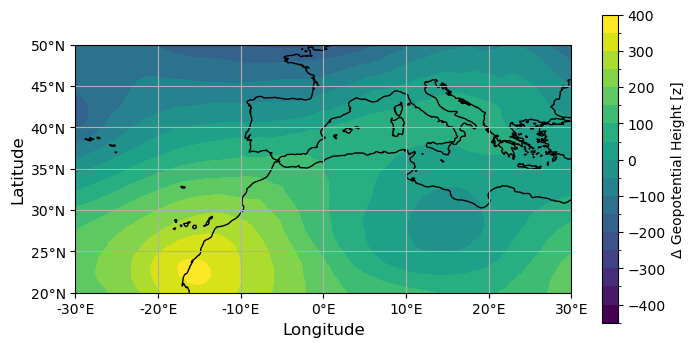

In [212]:
# Define the area and the levels for the colorbar
levels = np.arange(-450, 450, 50)
lon_range = slice(-30, 30)
lat_range = slice(20, 50)

# Read the geopotential height at 500hPa at a specific date
# we divide all values by the gravitational acceleration because the values refer to the geopotential 
ERA_z = ERA_data['z'].sel(level = 500, time='2023-07-12T12:00:00')/9.81

# Read the forecast for the geopotential height at 500hPa at a specific date using Pangu data
Pangu_z = Pangu_data_20230702.z.sel(isobaricInhPa=500, step= '2023-07-12T12:00:00')/9.81

# Calculate Anomaly
z_anomaly = ERA_z - Pangu_z
# Define the area of interest
z_anomaly = z_anomaly.sel(lon=lon_range, lat=lat_range)

# Plot the 2-meter temperature for the selected timesteps
fig, ax = plt.subplots(figsize=(8, 4), subplot_kw={'projection': ccrs.PlateCarree()})
# Use contour and define some parameters
xplot.contourf(z_anomaly, ax=ax, cmap='viridis', levels=levels, cbar_kwargs={'label': '\u0394 Geopotential Height [z]'})
# Add coastlines
ax.coastlines()
# Draw gridlines but no labels (we will do that later using a for loop) 
ax.gridlines(draw_labels=False)  

# Add labels and ticks
ax.set_ylabel('Latitude', fontsize=12)
# Define the latitudes
ax.set_yticks(range(20, 51, 5))  
# Set the latitudes using a for-loop
ax.set_yticklabels([f'{lat}°N' for lat in range(20, 51, 5)], fontsize=10) 
ax.set_xlabel('Longitude', fontsize=12)
# Define the longitude
ax.set_xticks(np.arange(-30, 31, 10)) 
# Set the longitudes using a for-loop
ax.set_xticklabels([f'{lon}°E' for lon in np.arange(-30, 31, 10)], fontsize=10)  
# we do not want any title because we will be using captions in the report
ax.set_title(None)

# Save the plot as a PDF file
#plt.savefig('../analysis/ERA_geopot_selected_timesteps_07.12.noon.pdf')

# Show the plot
plt.show()

### 5 Days Forecast Anomaly

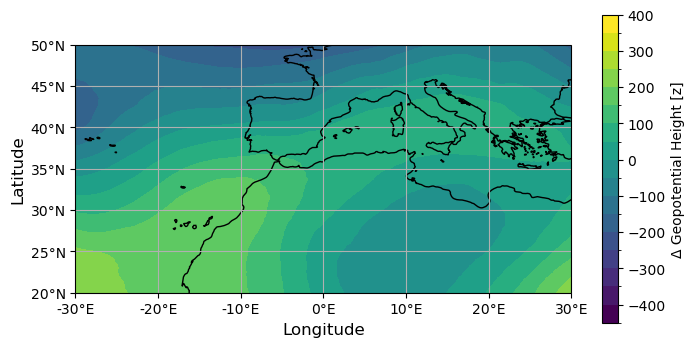

In [213]:
# Define the area and the levels for the colorbar
levels = np.arange(-450, 450, 50)
lon_range = slice(-30, 30)
lat_range = slice(20, 50)

# Read the geopotential height at 500hPa at a specific date
# we divide all values by the gravitational acceleration because the values refer to the geopotential 
ERA_z = ERA_data['z'].sel(level = 500, time='2023-07-12T12:00:00')/9.81

# Read the forecast for the geopotential height at 500hPa at a specific date using Pangu data
Pangu_z = Pangu_data_20230707.z.sel(isobaricInhPa=500, step= '2023-07-12T12:00:00')/9.81

# Calculate Anomaly
z_anomaly = ERA_z - Pangu_z
# Define the area of interest
z_anomaly = z_anomaly.sel(lon=lon_range, lat=lat_range)

# Plot the 2-meter temperature for the selected timesteps
fig, ax = plt.subplots(figsize=(8, 4), subplot_kw={'projection': ccrs.PlateCarree()})
# Use contour and define some parameters
xplot.contourf(z_anomaly, ax=ax, cmap='viridis', levels=levels, cbar_kwargs={'label': '\u0394 Geopotential Height [z]'})
# Add coastlines
ax.coastlines()
# Draw gridlines but no labels (we will do that later using a for loop) 
ax.gridlines(draw_labels=False)  

# Add labels and ticks
ax.set_ylabel('Latitude', fontsize=12)
# Define the latitudes
ax.set_yticks(range(20, 51, 5))  
# Set the latitudes using a for-loop
ax.set_yticklabels([f'{lat}°N' for lat in range(20, 51, 5)], fontsize=10) 
ax.set_xlabel('Longitude', fontsize=12)
# Define the longitude
ax.set_xticks(np.arange(-30, 31, 10)) 
# Set the longitudes using a for-loop
ax.set_xticklabels([f'{lon}°E' for lon in np.arange(-30, 31, 10)], fontsize=10)  
# we do not want any title because we will be using captions in the report
ax.set_title(None)

# Save the plot as a PDF file
#plt.savefig('../analysis/ERA_geopot_selected_timesteps_07.12.noon.pdf')

# Show the plot
plt.show()

### 1 Day Forecast Anomaly

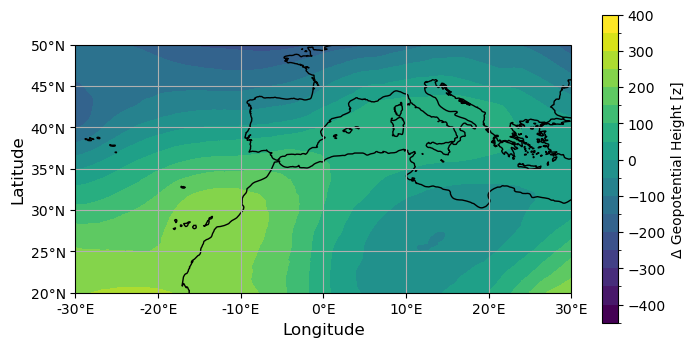

In [214]:
# Define the area and the levels for the colorbar
levels = np.arange(-450, 450, 50)
lon_range = slice(-30, 30)
lat_range = slice(20, 50)

# Read the geopotential height at 500hPa at a specific date
# we divide all values by the gravitational acceleration because the values refer to the geopotential 
ERA_z = ERA_data['z'].sel(level = 500, time='2023-07-12T12:00:00')/9.81

# Read the forecast for the geopotential height at 500hPa at a specific date using Pangu data
Pangu_z = Pangu_data_20230711.z.sel(isobaricInhPa=500, step= '2023-07-12T12:00:00')/9.81

# Calculate Anomaly
z_anomaly = ERA_z - Pangu_z
# Define the area of interest
z_anomaly = z_anomaly.sel(lon=lon_range, lat=lat_range)

# Plot the 2-meter temperature for the selected timesteps
fig, ax = plt.subplots(figsize=(8, 4), subplot_kw={'projection': ccrs.PlateCarree()})
# Use contour and define some parameters
xplot.contourf(z_anomaly, ax=ax, cmap='viridis', levels=levels, cbar_kwargs={'label': '\u0394 Geopotential Height [z]'})
# Add coastlines
ax.coastlines()
# Draw gridlines but no labels (we will do that later using a for loop) 
ax.gridlines(draw_labels=False)  

# Add labels and ticks
ax.set_ylabel('Latitude', fontsize=12)
# Define the latitudes
ax.set_yticks(range(20, 51, 5))  
# Set the latitudes using a for-loop
ax.set_yticklabels([f'{lat}°N' for lat in range(20, 51, 5)], fontsize=10) 
ax.set_xlabel('Longitude', fontsize=12)
# Define the longitude
ax.set_xticks(np.arange(-30, 31, 10)) 
# Set the longitudes using a for-loop
ax.set_xticklabels([f'{lon}°E' for lon in np.arange(-30, 31, 10)], fontsize=10)  
# we do not want any title because we will be using captions in the report
ax.set_title(None)

# Save the plot as a PDF file
#plt.savefig('../analysis/ERA_geopot_selected_timesteps_07.12.noon.pdf')

# Show the plot
plt.show()

## Geopotential Height Anomalies at Midnight

### 10 Days Forecast Anomaly

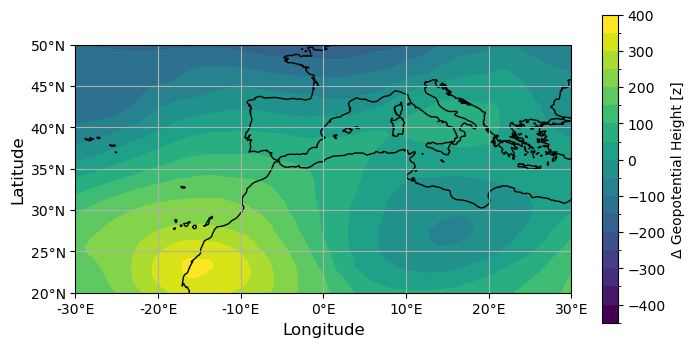

In [215]:
# Define the area and the levels for the colorbar
levels = np.arange(-450, 450, 50)
lon_range = slice(-30, 30)
lat_range = slice(20, 50)

# Read the geopotential height at 500hPa at a specific date
# we divide all values by the gravitational acceleration because the values refer to the geopotential 
ERA_z = ERA_data['z'].sel(level = 500, time='2023-07-13T00:00:00')/9.81

# Read the forecast for the geopotential height at 500hPa at a specific date using Pangu data
Pangu_z = Pangu_data_20230702.z.sel(isobaricInhPa=500, step= '2023-07-13T00:00:00')/9.81

# Calculate Anomaly
z_anomaly = ERA_z - Pangu_z
# Define the area of interest
z_anomaly = z_anomaly.sel(lon=lon_range, lat=lat_range)

# Plot the 2-meter temperature for the selected timesteps
fig, ax = plt.subplots(figsize=(8, 4), subplot_kw={'projection': ccrs.PlateCarree()})
# Use contour and define some parameters
xplot.contourf(z_anomaly, ax=ax, cmap='viridis', levels=levels, cbar_kwargs={'label': '\u0394 Geopotential Height [z]'})
# Add coastlines
ax.coastlines()
# Draw gridlines but no labels (we will do that later using a for loop) 
ax.gridlines(draw_labels=False)  

# Add labels and ticks
ax.set_ylabel('Latitude', fontsize=12)
# Define the latitudes
ax.set_yticks(range(20, 51, 5))  
# Set the latitudes using a for-loop
ax.set_yticklabels([f'{lat}°N' for lat in range(20, 51, 5)], fontsize=10) 
ax.set_xlabel('Longitude', fontsize=12)
# Define the longitude
ax.set_xticks(np.arange(-30, 31, 10)) 
# Set the longitudes using a for-loop
ax.set_xticklabels([f'{lon}°E' for lon in np.arange(-30, 31, 10)], fontsize=10)  
# we do not want any title because we will be using captions in the report
ax.set_title(None)

# Save the plot as a PDF file
#plt.savefig('../analysis/ERA_geopot_selected_timesteps_07.12.noon.pdf')

# Show the plot
plt.show()

### 5 Days Forecast Anomaly

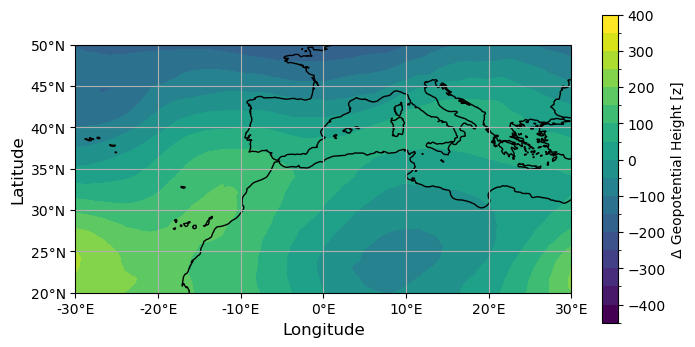

In [216]:
# Define the area and the levels for the colorbar
levels = np.arange(-450, 450, 50)
lon_range = slice(-30, 30)
lat_range = slice(20, 50)

# Read the geopotential height at 500hPa at a specific date
# we divide all values by the gravitational acceleration because the values refer to the geopotential 
ERA_z = ERA_data['z'].sel(level = 500, time='2023-07-13T00:00:00')/9.81

# Read the forecast for the geopotential height at 500hPa at a specific date using Pangu data
Pangu_z = Pangu_data_20230707.z.sel(isobaricInhPa=500, step= '2023-07-13T00:00:00')/9.81

# Calculate Anomaly
z_anomaly = ERA_z - Pangu_z
# Define the area of interest
z_anomaly = z_anomaly.sel(lon=lon_range, lat=lat_range)

# Plot the 2-meter temperature for the selected timesteps
fig, ax = plt.subplots(figsize=(8, 4), subplot_kw={'projection': ccrs.PlateCarree()})
# Use contour and define some parameters
xplot.contourf(z_anomaly, ax=ax, cmap='viridis', levels=levels, cbar_kwargs={'label': '\u0394 Geopotential Height [z]'})
# Add coastlines
ax.coastlines()
# Draw gridlines but no labels (we will do that later using a for loop) 
ax.gridlines(draw_labels=False)  

# Add labels and ticks
ax.set_ylabel('Latitude', fontsize=12)
# Define the latitudes
ax.set_yticks(range(20, 51, 5))  
# Set the latitudes using a for-loop
ax.set_yticklabels([f'{lat}°N' for lat in range(20, 51, 5)], fontsize=10) 
ax.set_xlabel('Longitude', fontsize=12)
# Define the longitude
ax.set_xticks(np.arange(-30, 31, 10)) 
# Set the longitudes using a for-loop
ax.set_xticklabels([f'{lon}°E' for lon in np.arange(-30, 31, 10)], fontsize=10)  
# we do not want any title because we will be using captions in the report
ax.set_title(None)

# Save the plot as a PDF file
#plt.savefig('../analysis/ERA_geopot_selected_timesteps_07.12.noon.pdf')

# Show the plot
plt.show()

### 1 Day Forecast Anomaly

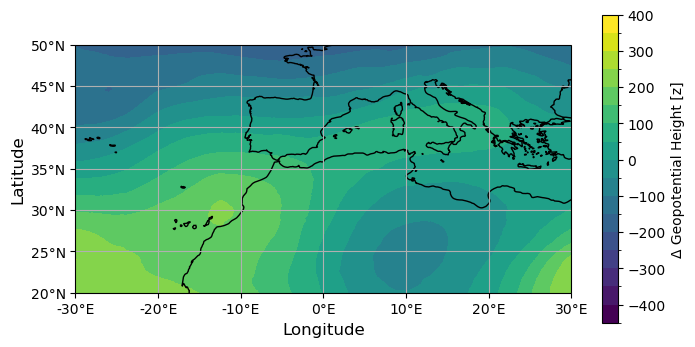

In [217]:
# Define the area and the levels for the colorbar
levels = np.arange(-450, 450, 50)
lon_range = slice(-30, 30)
lat_range = slice(20, 50)

# Read the geopotential height at 500hPa at a specific date
# we divide all values by the gravitational acceleration because the values refer to the geopotential 
ERA_z = ERA_data['z'].sel(level = 500, time='2023-07-13T00:00:00')/9.81

# Read the forecast for the geopotential height at 500hPa at a specific date using Pangu data
Pangu_z = Pangu_data_20230711.z.sel(isobaricInhPa=500, step= '2023-07-13T00:00:00')/9.81

# Calculate Anomaly
z_anomaly = ERA_z - Pangu_z
# Define the area of interest
z_anomaly = z_anomaly.sel(lon=lon_range, lat=lat_range)

# Plot the 2-meter temperature for the selected timesteps
fig, ax = plt.subplots(figsize=(8, 4), subplot_kw={'projection': ccrs.PlateCarree()})
# Use contour and define some parameters
xplot.contourf(z_anomaly, ax=ax, cmap='viridis', levels=levels, cbar_kwargs={'label': '\u0394 Geopotential Height [z]'})
# Add coastlines
ax.coastlines()
# Draw gridlines but no labels (we will do that later using a for loop) 
ax.gridlines(draw_labels=False)  

# Add labels and ticks
ax.set_ylabel('Latitude', fontsize=12)
# Define the latitudes
ax.set_yticks(range(20, 51, 5))  
# Set the latitudes using a for-loop
ax.set_yticklabels([f'{lat}°N' for lat in range(20, 51, 5)], fontsize=10) 
ax.set_xlabel('Longitude', fontsize=12)
# Define the longitude
ax.set_xticks(np.arange(-30, 31, 10)) 
# Set the longitudes using a for-loop
ax.set_xticklabels([f'{lon}°E' for lon in np.arange(-30, 31, 10)], fontsize=10)  
# we do not want any title because we will be using captions in the report
ax.set_title(None)

# Save the plot as a PDF file
#plt.savefig('../analysis/ERA_geopot_selected_timesteps_07.12.noon.pdf')

# Show the plot
plt.show()

## 2 Meter Air Temperature Anomalies at Noon

### 10 Days Forecast Anomaly

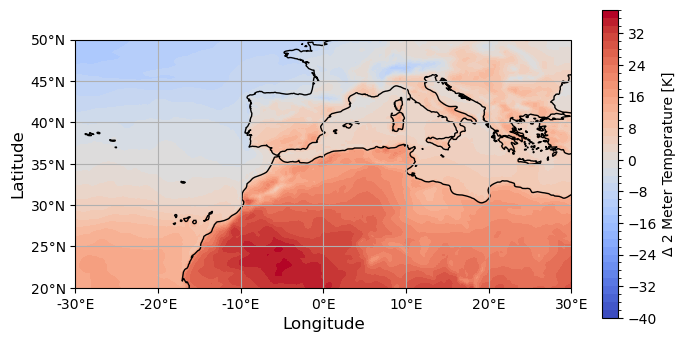

In [227]:
# Define the area and the levels for the colorbar
levels = np.arange(-40, 40, 2)
lon_range = slice(-30, 30)
lat_range = slice(20, 50)

# Read the geopotential height at 500hPa at a specific date
# we divide all values by the gravitational acceleration because the values refer to the geopotential 
ERA_t2m = ERA_data['t2m'].sel(time='2023-07-12T12:00:00')

# Read the forecast for the geopotential height at 500hPa at a specific date using Pangu data
Pangu_t2 = Pangu_data_20230702.t2.sel(step= '2023-07-12T12:00:00')

# Calculate Anomaly
t2m_anomaly = ERA_t2m - Pangu_t2
# Define the area of interest
t2m_anomaly = t2m_anomaly.sel(lon=lon_range, lat=lat_range)

# Plot the 2-meter temperature for the selected timesteps
fig, ax = plt.subplots(figsize=(8, 4), subplot_kw={'projection': ccrs.PlateCarree()})
# Use contour and define some parameters
xplot.contourf(t2m_anomaly, ax=ax, cmap='coolwarm', levels=levels, cbar_kwargs={'label': '\u0394 2 Meter Temperature [K]'})
# Add coastlines
ax.coastlines()
# Draw gridlines but no labels (we will do that later using a for loop) 
ax.gridlines(draw_labels=False)  

# Add labels and ticks
ax.set_ylabel('Latitude', fontsize=12)
# Define the latitudes
ax.set_yticks(range(20, 51, 5))  
# Set the latitudes using a for-loop
ax.set_yticklabels([f'{lat}°N' for lat in range(20, 51, 5)], fontsize=10) 
ax.set_xlabel('Longitude', fontsize=12)
# Define the longitude
ax.set_xticks(np.arange(-30, 31, 10)) 
# Set the longitudes using a for-loop
ax.set_xticklabels([f'{lon}°E' for lon in np.arange(-30, 31, 10)], fontsize=10)  
# we do not want any title because we will be using captions in the report
ax.set_title(None)

# Save the plot as a PDF file
#plt.savefig('../analysis/ERA_geopot_selected_timesteps_07.12.noon.pdf')

# Show the plot
plt.show()

### 5 Days Forescast Anomaly

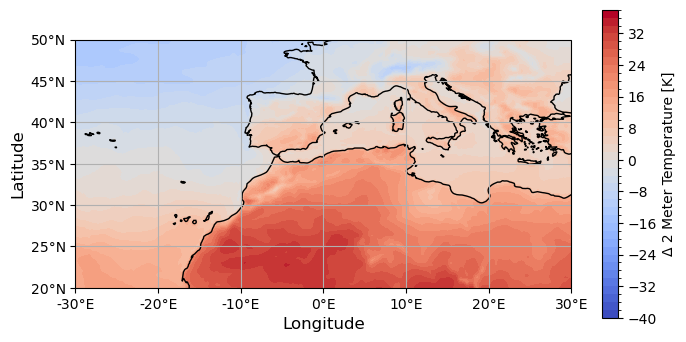

In [225]:
# Define the area and the levels for the colorbar
levels = np.arange(-40, 40, 2)
lon_range = slice(-30, 30)
lat_range = slice(20, 50)

# Read the geopotential height at 500hPa at a specific date
# we divide all values by the gravitational acceleration because the values refer to the geopotential 
ERA_t2m = ERA_data['t2m'].sel(time='2023-07-12T12:00:00')

# Read the forecast for the geopotential height at 500hPa at a specific date using Pangu data
Pangu_t2 = Pangu_data_20230707.t2.sel(step= '2023-07-12T12:00:00')

# Calculate Anomaly
t2m_anomaly = ERA_t2m - Pangu_t2
# Define the area of interest
t2m_anomaly = t2m_anomaly.sel(lon=lon_range, lat=lat_range)

# Plot the 2-meter temperature for the selected timesteps
fig, ax = plt.subplots(figsize=(8, 4), subplot_kw={'projection': ccrs.PlateCarree()})
# Use contour and define some parameters
xplot.contourf(t2m_anomaly, ax=ax, cmap='coolwarm', levels=levels, cbar_kwargs={'label': '\u0394 2 Meter Temperature [K]'})
# Add coastlines
ax.coastlines()
# Draw gridlines but no labels (we will do that later using a for loop) 
ax.gridlines(draw_labels=False)  

# Add labels and ticks
ax.set_ylabel('Latitude', fontsize=12)
# Define the latitudes
ax.set_yticks(range(20, 51, 5))  
# Set the latitudes using a for-loop
ax.set_yticklabels([f'{lat}°N' for lat in range(20, 51, 5)], fontsize=10) 
ax.set_xlabel('Longitude', fontsize=12)
# Define the longitude
ax.set_xticks(np.arange(-30, 31, 10)) 
# Set the longitudes using a for-loop
ax.set_xticklabels([f'{lon}°E' for lon in np.arange(-30, 31, 10)], fontsize=10)  
# we do not want any title because we will be using captions in the report
ax.set_title(None)

# Save the plot as a PDF file
#plt.savefig('../analysis/ERA_geopot_selected_timesteps_07.12.noon.pdf')

# Show the plot
plt.show()

### 1 Day Forecast Anomaly

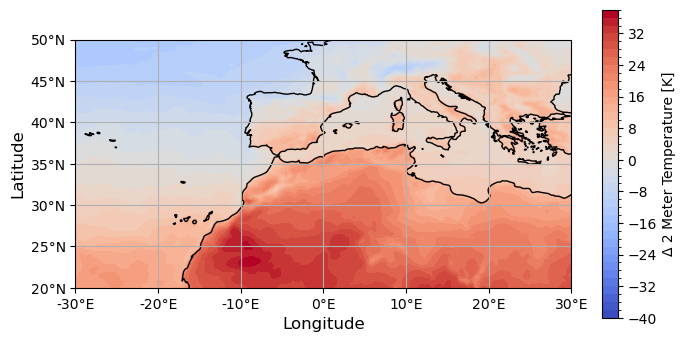

In [226]:
# Define the area and the levels for the colorbar
levels = np.arange(-40, 40, 2)
lon_range = slice(-30, 30)
lat_range = slice(20, 50)

# Read the geopotential height at 500hPa at a specific date
# we divide all values by the gravitational acceleration because the values refer to the geopotential 
ERA_t2m = ERA_data['t2m'].sel(time='2023-07-12T12:00:00')

# Read the forecast for the geopotential height at 500hPa at a specific date using Pangu data
Pangu_t2 = Pangu_data_20230711.t2.sel(step= '2023-07-12T12:00:00')

# Calculate Anomaly
t2m_anomaly = ERA_t2m - Pangu_t2
# Define the area of interest
t2m_anomaly = t2m_anomaly.sel(lon=lon_range, lat=lat_range)

# Plot the 2-meter temperature for the selected timesteps
fig, ax = plt.subplots(figsize=(8, 4), subplot_kw={'projection': ccrs.PlateCarree()})
# Use contour and define some parameters
xplot.contourf(t2m_anomaly, ax=ax, cmap='coolwarm', levels=levels, cbar_kwargs={'label': '\u0394 2 Meter Temperature [K]'})
# Add coastlines
ax.coastlines()
# Draw gridlines but no labels (we will do that later using a for loop) 
ax.gridlines(draw_labels=False)  

# Add labels and ticks
ax.set_ylabel('Latitude', fontsize=12)
# Define the latitudes
ax.set_yticks(range(20, 51, 5))  
# Set the latitudes using a for-loop
ax.set_yticklabels([f'{lat}°N' for lat in range(20, 51, 5)], fontsize=10) 
ax.set_xlabel('Longitude', fontsize=12)
# Define the longitude
ax.set_xticks(np.arange(-30, 31, 10)) 
# Set the longitudes using a for-loop
ax.set_xticklabels([f'{lon}°E' for lon in np.arange(-30, 31, 10)], fontsize=10)  
# we do not want any title because we will be using captions in the report
ax.set_title(None)

# Save the plot as a PDF file
#plt.savefig('../analysis/ERA_geopot_selected_timesteps_07.12.noon.pdf')

# Show the plot
plt.show()

## 2 Meter Air Temperature Anomalies at Midnight

### 10 Days Forecast Anomaly

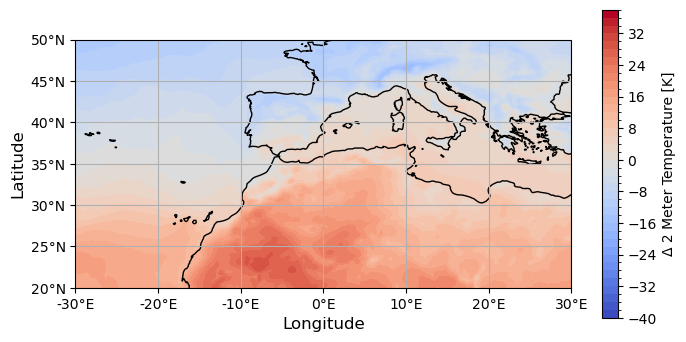

In [228]:
# Define the area and the levels for the colorbar
levels = np.arange(-40, 40, 2)
lon_range = slice(-30, 30)
lat_range = slice(20, 50)

# Read the geopotential height at 500hPa at a specific date
# we divide all values by the gravitational acceleration because the values refer to the geopotential 
ERA_t2m = ERA_data['t2m'].sel(time='2023-07-13T00:00:00')

# Read the forecast for the geopotential height at 500hPa at a specific date using Pangu data
Pangu_t2 = Pangu_data_20230702.t2.sel(step= '2023-07-13T00:00:00')

# Calculate Anomaly
t2m_anomaly = ERA_t2m - Pangu_t2
# Define the area of interest
t2m_anomaly = t2m_anomaly.sel(lon=lon_range, lat=lat_range)

# Plot the 2-meter temperature for the selected timesteps
fig, ax = plt.subplots(figsize=(8, 4), subplot_kw={'projection': ccrs.PlateCarree()})
# Use contour and define some parameters
xplot.contourf(t2m_anomaly, ax=ax, cmap='coolwarm', levels=levels, cbar_kwargs={'label': '\u0394 2 Meter Temperature [K]'})
# Add coastlines
ax.coastlines()
# Draw gridlines but no labels (we will do that later using a for loop) 
ax.gridlines(draw_labels=False)  

# Add labels and ticks
ax.set_ylabel('Latitude', fontsize=12)
# Define the latitudes
ax.set_yticks(range(20, 51, 5))  
# Set the latitudes using a for-loop
ax.set_yticklabels([f'{lat}°N' for lat in range(20, 51, 5)], fontsize=10) 
ax.set_xlabel('Longitude', fontsize=12)
# Define the longitude
ax.set_xticks(np.arange(-30, 31, 10)) 
# Set the longitudes using a for-loop
ax.set_xticklabels([f'{lon}°E' for lon in np.arange(-30, 31, 10)], fontsize=10)  
# we do not want any title because we will be using captions in the report
ax.set_title(None)

# Save the plot as a PDF file
#plt.savefig('../analysis/ERA_geopot_selected_timesteps_07.12.noon.pdf')

# Show the plot
plt.show()

### 5 Days Forecast Anomaly

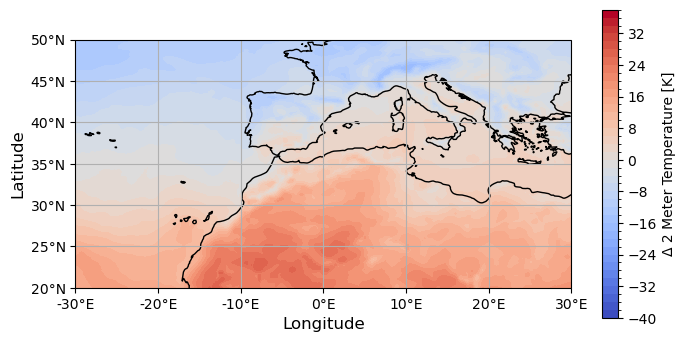

In [229]:
# Define the area and the levels for the colorbar
levels = np.arange(-40, 40, 2)
lon_range = slice(-30, 30)
lat_range = slice(20, 50)

# Read the geopotential height at 500hPa at a specific date
# we divide all values by the gravitational acceleration because the values refer to the geopotential 
ERA_t2m = ERA_data['t2m'].sel(time='2023-07-13T00:00:00')

# Read the forecast for the geopotential height at 500hPa at a specific date using Pangu data
Pangu_t2 = Pangu_data_20230707.t2.sel(step= '2023-07-13T00:00:00')

# Calculate Anomaly
t2m_anomaly = ERA_t2m - Pangu_t2
# Define the area of interest
t2m_anomaly = t2m_anomaly.sel(lon=lon_range, lat=lat_range)

# Plot the 2-meter temperature for the selected timesteps
fig, ax = plt.subplots(figsize=(8, 4), subplot_kw={'projection': ccrs.PlateCarree()})
# Use contour and define some parameters
xplot.contourf(t2m_anomaly, ax=ax, cmap='coolwarm', levels=levels, cbar_kwargs={'label': '\u0394 2 Meter Temperature [K]'})
# Add coastlines
ax.coastlines()
# Draw gridlines but no labels (we will do that later using a for loop) 
ax.gridlines(draw_labels=False)  

# Add labels and ticks
ax.set_ylabel('Latitude', fontsize=12)
# Define the latitudes
ax.set_yticks(range(20, 51, 5))  
# Set the latitudes using a for-loop
ax.set_yticklabels([f'{lat}°N' for lat in range(20, 51, 5)], fontsize=10) 
ax.set_xlabel('Longitude', fontsize=12)
# Define the longitude
ax.set_xticks(np.arange(-30, 31, 10)) 
# Set the longitudes using a for-loop
ax.set_xticklabels([f'{lon}°E' for lon in np.arange(-30, 31, 10)], fontsize=10)  
# we do not want any title because we will be using captions in the report
ax.set_title(None)

# Save the plot as a PDF file
#plt.savefig('../analysis/ERA_geopot_selected_timesteps_07.12.noon.pdf')

# Show the plot
plt.show()

### 1 Day Forecast Anomaly

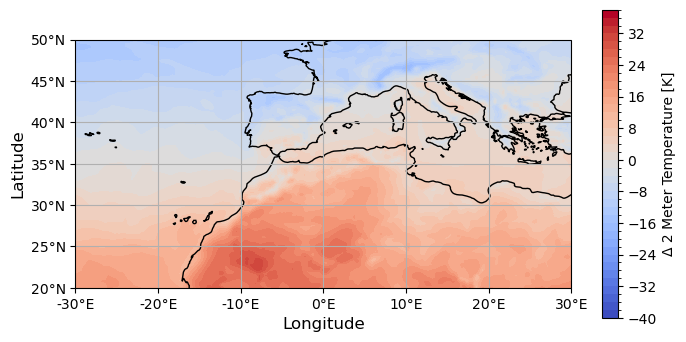

In [230]:
# Define the area and the levels for the colorbar
levels = np.arange(-40, 40, 2)
lon_range = slice(-30, 30)
lat_range = slice(20, 50)

# Read the geopotential height at 500hPa at a specific date
# we divide all values by the gravitational acceleration because the values refer to the geopotential 
ERA_t2m = ERA_data['t2m'].sel(time='2023-07-13T00:00:00')

# Read the forecast for the geopotential height at 500hPa at a specific date using Pangu data
Pangu_t2 = Pangu_data_20230711.t2.sel(step= '2023-07-13T00:00:00')

# Calculate Anomaly
t2m_anomaly = ERA_t2m - Pangu_t2
# Define the area of interest
t2m_anomaly = t2m_anomaly.sel(lon=lon_range, lat=lat_range)

# Plot the 2-meter temperature for the selected timesteps
fig, ax = plt.subplots(figsize=(8, 4), subplot_kw={'projection': ccrs.PlateCarree()})
# Use contour and define some parameters
xplot.contourf(t2m_anomaly, ax=ax, cmap='coolwarm', levels=levels, cbar_kwargs={'label': '\u0394 2 Meter Temperature [K]'})
# Add coastlines
ax.coastlines()
# Draw gridlines but no labels (we will do that later using a for loop) 
ax.gridlines(draw_labels=False)  

# Add labels and ticks
ax.set_ylabel('Latitude', fontsize=12)
# Define the latitudes
ax.set_yticks(range(20, 51, 5))  
# Set the latitudes using a for-loop
ax.set_yticklabels([f'{lat}°N' for lat in range(20, 51, 5)], fontsize=10) 
ax.set_xlabel('Longitude', fontsize=12)
# Define the longitude
ax.set_xticks(np.arange(-30, 31, 10)) 
# Set the longitudes using a for-loop
ax.set_xticklabels([f'{lon}°E' for lon in np.arange(-30, 31, 10)], fontsize=10)  
# we do not want any title because we will be using captions in the report
ax.set_title(None)

# Save the plot as a PDF file
#plt.savefig('../analysis/ERA_geopot_selected_timesteps_07.12.noon.pdf')

# Show the plot
plt.show()

# Forecasts for Specific Locations

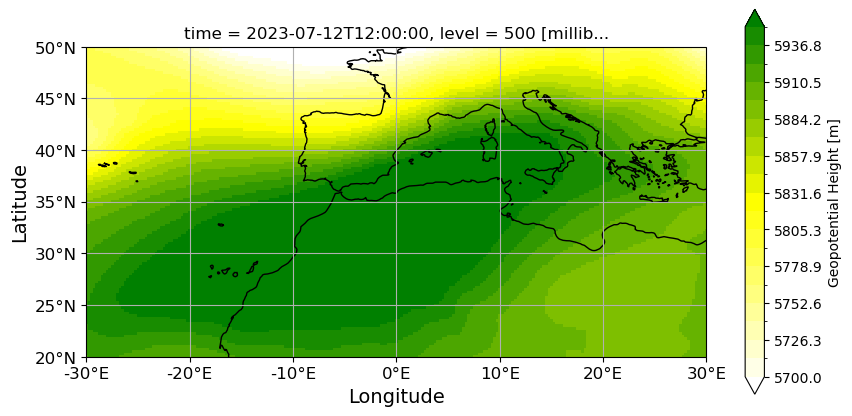

In [231]:
ERA_data = xr.open_dataset('../data/ERA_data_july_heatwaves.nc')
vmin = 5700
vmax = 5950
cmap = colors.LinearSegmentedColormap.from_list('mycmap', ['white', 'yellow','green'])

fig = plt.figure(figsize=[10, 5])
map_projection = ccrs.PlateCarree()
ax = plt.axes(projection=map_projection)
ax.set_extent([-30, 30, 20, 50])
ax.set_ylim([30,50])
ax.gridlines(draw_labels=False)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE, linestyle='-')
ax.set_yticks(range(20, 51, 5))  # Add explicit ticks for the y-axis
ax.set_yticklabels([f'{lat}°N' for lat in range(20, 51, 5)], fontsize=12)  # Add explicit labels for the y-axis
ax.set_xticks(np.arange(-30, 31, 10))  # Add explicit ticks for the x-axis with 10 degree step
ax.set_xticklabels([f'{lon}°E' for lon in np.arange(-30, 31, 10)], fontsize=12)  # Add explicit labels for the x-axis
ax.set_title(rounded_time.values, fontsize=12)
im = (ERA_data.z.sel(level = 500, time=ERA_data.time[46])/9.81).plot(ax=ax, cmap=cmap, vmin=vmin, vmax=vmax, levels=20, add_colorbar=False)

ax.set_ylabel('Latitude', fontsize=14)
ax.set_xlabel('Longitude', fontsize=14)

# Add colorbar
cbar = plt.colorbar(im, ax=ax)
cbar.set_label('Geopotential Height [m]')

plt.savefig('../analysis/ERA_geopot.1200.pdf')

plt.show()

## Scatter- and Lineplots

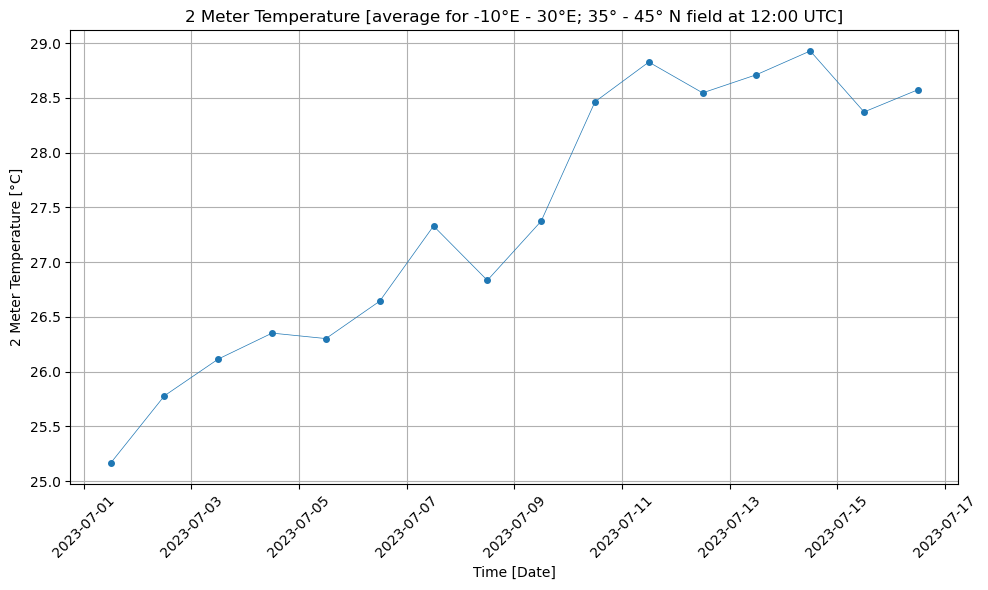

In [234]:
# Select the desired area (e.g., longitude -30 to 30, latitude 20 to 50)
lon_range = slice(-10, 30)
lat_range = slice(35, 45)

# Select the 2-meter temperature data for the specified longitude and latitude ranges
t2m_sliced = ERA_data['t2m'].sel(lon=lon_range, lat=lat_range)-273.15

# Select specific timesteps
selected_timesteps = t2m_sliced['time'].isel(time=slice(2, 64, 4))

# Filter the data to include only the selected timesteps
t2m_selected = t2m_sliced.sel(time=selected_timesteps)

# Calculate the mean temperature for each time step
mean_temperature = t2m_selected.mean(dim=('lon', 'lat'))

# Convert time to a pandas datetime index for plotting
mean_temperature = mean_temperature.to_pandas()

# Plot scatterplot with tiny lines
plt.figure(figsize=(10, 6))
plt.plot(mean_temperature.index, mean_temperature.values, marker='o', linestyle='-', markersize=4, linewidth=0.5)
plt.xlabel('Time [Date]')
plt.ylabel('2 Meter Temperature [°C]')
plt.title('2 Meter Temperature [average for -10°E - 30°E; 35° - 45° N field at 12:00 UTC]')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.grid(True)
plt.tight_layout()
plt.show()

Cities of Interests: 

Madrid: 40.416775, -3.703790
Athena: 37.983810, 23.727539
Zagreb: 45.815399, 15.966568
Ljubljana 46.056946, 14.505751
Belgrade 44.787197, 20.457273
Rome : 

<xarray.DataArray 't2m' (time: 17)> Size: 68B
array([29.292816, 31.736877, 32.327362, 31.791626, 30.413177, 30.722107,
       30.673218, 30.46402 , 31.467041, 35.26413 , 36.68756 , 31.005615,
       31.975403, 34.05774 , 29.613495, 30.114014, 34.288483],
      dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 136B 2023-07-01T12:00:00 ... 2023-07-17T12...
    lon      float32 4B -3.75
    lat      float32 4B 40.5


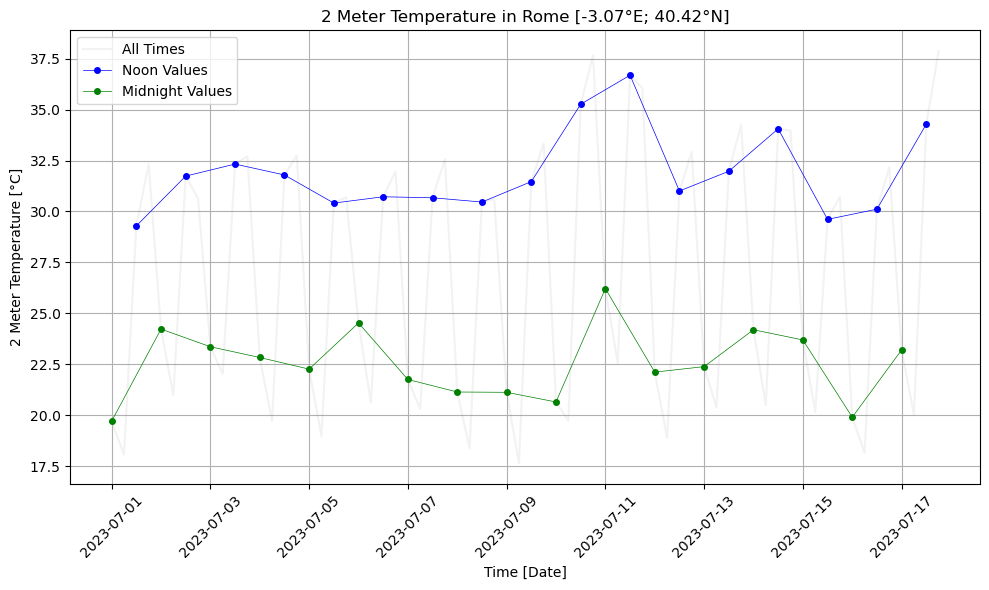

In [199]:
# The latitude and longitude of the desired location
desired_lat = 40.416775
desired_lon = -3.703790

# Select the 2-meter temperature data for the nearest longitude to the desired location
t2m_at_location = ERA_data['t2m'].sel(lon=desired_lon, lat=desired_lat, method='nearest') - 273.15  # Convert to Celsius

# Convert time to a pandas datetime index for plotting
time_index = t2m_at_location.time.to_pandas()

# Extract temperature values
temperature_values = t2m_at_location.values

# Filter the data for noon and midnight values
noon_values = t2m_at_location.sel(time=t2m_at_location['time.hour'] == 12)
midnight_values = t2m_at_location.sel(time=t2m_at_location['time.hour'] == 0)

# Convert time to a pandas datetime index for plotting
noon_time_index = noon_values.time.to_pandas()
midnight_time_index = midnight_values.time.to_pandas()

# Extract temperature values for noon and midnight
noon_temperature_values = noon_values.values
midnight_temperature_values = midnight_values.values

# Plot line plot with temperature values over time
plt.figure(figsize=(10, 6))
plt.plot(time_index, temperature_values, color='gray', alpha=0.1, label='All Times')
plt.plot(noon_time_index, noon_temperature_values, marker='o', linestyle='-', markersize=4, linewidth=0.5, color='blue', label='Noon Values')
plt.plot(midnight_time_index, midnight_temperature_values, marker='o', linestyle='-', markersize=4,linewidth=0.5, color='green', label='Midnight Values')
plt.xlabel('Time [Date]')
plt.ylabel('2 Meter Temperature [°C]')
plt.title('2 Meter Temperature in Rome [-3.07°E; 40.42°N]')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

## Other Things

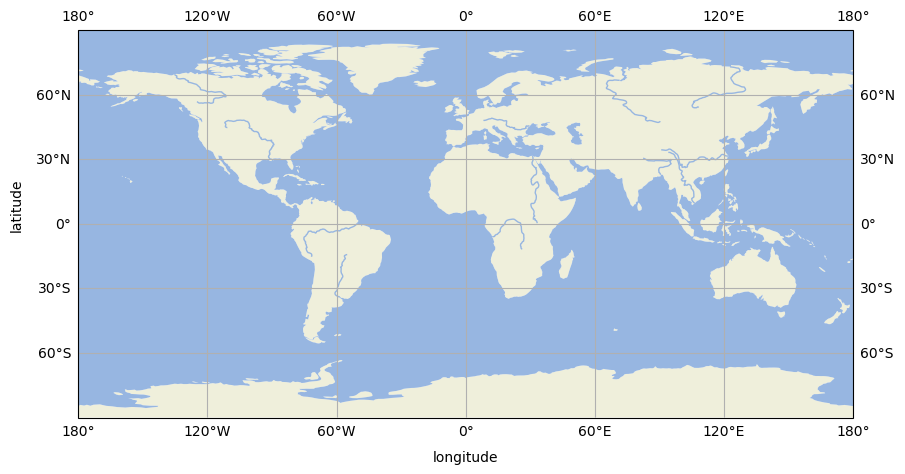

In [235]:
fig = plt.figure(figsize=[10,8])
# What are the units of the figure size? Try to find out.
#
# Geographic maps can have different projection system. 
# Now, we will specify that we want the axes of our figure in PlateCarree projection.
# We won't go into details of projection 


map_projection = ccrs.PlateCarree()
ax = plt.axes(projection=map_projection)
ax.set_extent([-180, 180, -90, 90]) # setting the borders of our map

# adding features to our map
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
#ax.add_feature(cfeature.COASTLINE)

ax.add_feature(cfeature.RIVERS)
gridlines = ax.gridlines(draw_labels=True)

#gridlines.left_labels = False
#gridlines.top_labels = False

## Note: Normal labeling doesn't work as Cartopy's labeling takeover the matplotlib commands
#ax.set_xlabel('longitude')
#ax.set_ylabel('latitude')

ax.text(-0.07, 0.55, 'latitude', va='bottom', ha='center',
        rotation='vertical', rotation_mode='anchor',
        transform=ax.transAxes)
ax.text(0.5, -0.12, 'longitude', va='bottom', ha='center',
        rotation='horizontal', rotation_mode='anchor',
        transform=ax.transAxes);